## Udacity Data Analyst Nanodegree Data Visualisation Project

### Trends in Prosper Loan Dataset

#### By Idris Bakare




--

## INTRODUCTION

This project was carried out in fulfillment of the requirements for the Udacity Data Analyst Nanodegree.

In this project, I present results of the analysis of loan data from Prosper. Prosper is a peer-to-peer lending platform where borrowers from different walks of life can access loans to fulfill their financial obligations. The loans are however funded by investors, not Prosper. There are 81 fields and 113,937 records in this dataset.

For the purpose of this project, I focused my exploration on the below listed parameters;

1. Borrower Rate
2. Tenor
3. Prosper Rating
4. Period the loans were taken(year, month)
5. Customers with current delinquecies
6. Loan Amount


I carried out univariate, bivariate and multivariate analysis on these parameters to identify trends and patterns and demonstrate how they interact with one another.

--

### Preliminary Wrangling

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading the loan dataset into pandas dataframe

loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Assessing the first 5 rows of the data

loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Assessing general info about the dataset

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
loan_df.shape

(113937, 81)

In [7]:
# creating a copy of the dataframe to perform some wrangling

loan_df_clean = loan_df.copy()

In [8]:
# Converting the Listing Creation date to datetime format

loan_df_clean['ListingCreationDate'] = pd.to_datetime(loan_df_clean['ListingCreationDate'])

In [9]:
# Multiplying the BorrowerRate column by 100 to get percentage figure

loan_df_clean['BorrowerRate'] = loan_df_clean['BorrowerRate']*100

In [10]:
# Creating columns for month and year from the Listing Creation Date column

loan_df_clean['Month'] = pd.DatetimeIndex(loan_df_clean['ListingCreationDate']).month
loan_df_clean['Year'] = pd.DatetimeIndex(loan_df_clean['ListingCreationDate']).year

In [11]:
# Assessing dataframe

loan_df_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Month,Year
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,15.80,0.1380,...,0.0,0.0,0.0,1.0,0,0,0.0,258,8,2007
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,9.20,0.0820,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2,2014
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,27.50,0.2400,...,0.0,0.0,0.0,1.0,0,0,0.0,41,1,2007
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,9.74,0.0874,...,0.0,0.0,0.0,1.0,0,0,0.0,158,10,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,20.85,0.1985,...,0.0,0.0,0.0,1.0,0,0,0.0,20,9,2013


#### UNIVARIATE ANALYSIS

In the first plot, I'll examine the distribution on borrower rates. Key questions to keep in mind is what interest rate range has the highest frequency of occurence. Are high rates more frequently occuring than the lower rates? At what point does the rate peak and begin to drop?

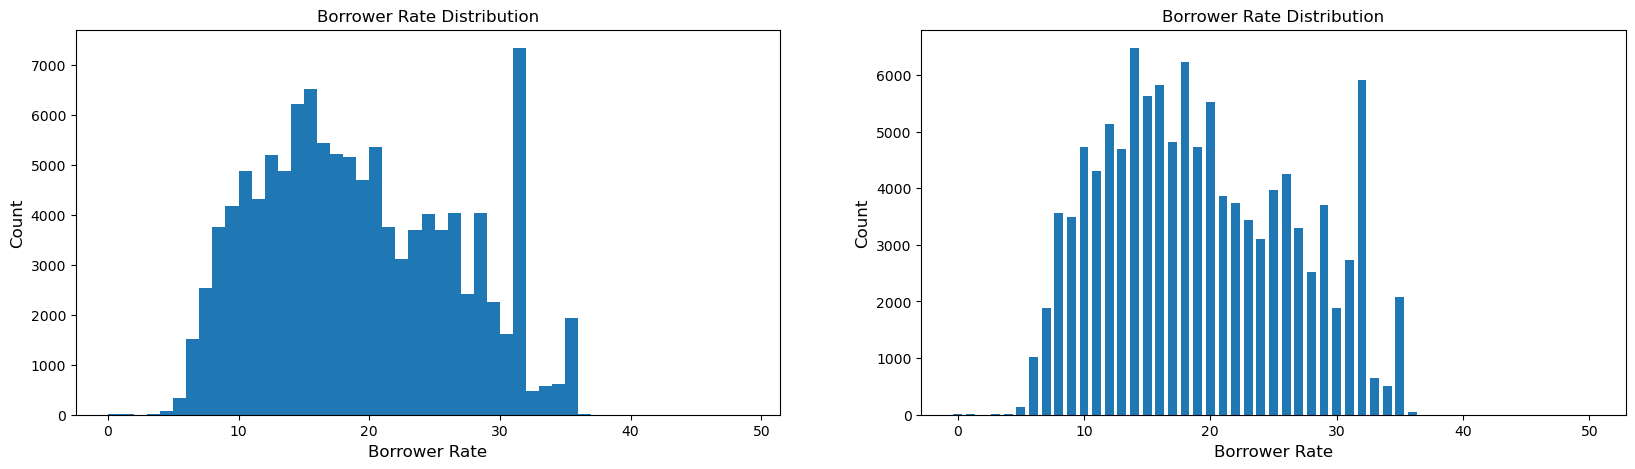

In [12]:
plt.figure(figsize = [20,5])

def subplot(x, xlabel, ylabel, title):
    'Creates a histplot by passing in the required parameters'
    # Set xlabel, ylabel and title:
    plt.xlabel(xlabel,size=12)
    plt.ylabel(ylabel, size=12)
    plt.title(title, size=12)


plt.subplot(1,2,1)
bin_vals = np.arange(0.0, loan_df_clean['BorrowerRate'].max(), 1)
hist1 = plt.hist(data = loan_df_clean, x = 'BorrowerRate', bins = bin_vals);
subplot(hist1, 'Borrower Rate', 'Count', 'Borrower Rate Distribution')

plt.subplot(1,2,2)
bin_vals = np.arange(-0.5, loan_df_clean['BorrowerRate'].max()+1.5, 1)
hist2 = plt.hist(data = loan_df_clean, x = 'BorrowerRate', bins = bin_vals, rwidth = 0.7)
subplot(hist1, 'Borrower Rate', 'Count', 'Borrower Rate Distribution');



As we can see from the above plots, borrower rates tend to peak between 10 and 20% and gradually declines except for outliers around the 33% mark

--

In the next plot, I'll be investigating the distribution of loan amounts to discover the frequently occuring loan amounts. What amounts are the most common principals for Prosper loans and the patterns that exists.

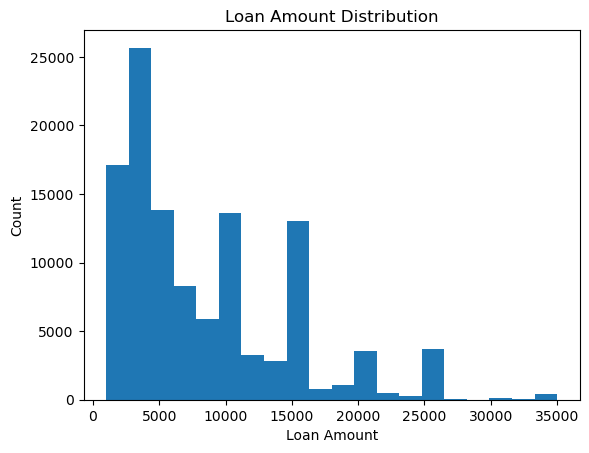

In [13]:
# plot a histogram showing the distribution of the Original Loan Amount
plt.hist(data = loan_df_clean, x = 'LoanOriginalAmount', bins = 20)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Loan Amount Distribution');

The loan amounts distribution plot is skewed to the left with most frequently occuring loan amounts between 10k and 15k except for the peaks at 4k. The loan amounts genereally begin to becomes less frequent after 15k.

--

In the next plot, I'll be observing the distribution of loan status. Are there more active than current loans? Also, what number of loans end up as defaulted loans?

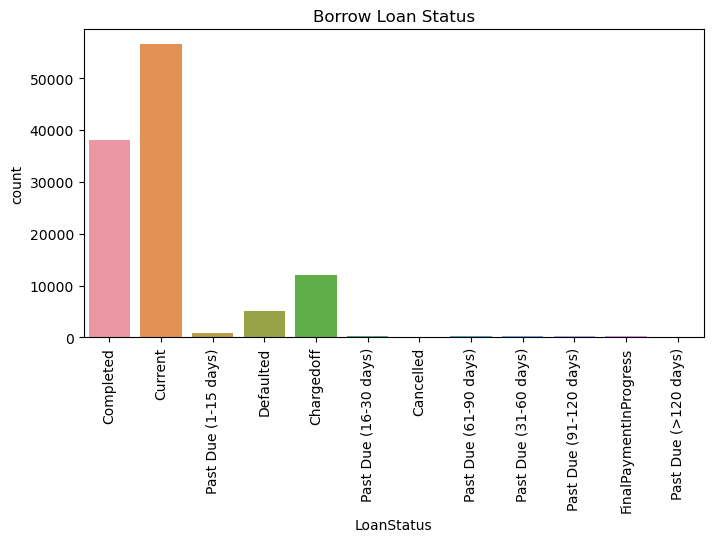

In [37]:
plt.figure(figsize=[8, 4])
sns.countplot(data=loan_df_clean, x='LoanStatus');
plt.xticks(rotation=90);
plt.title('Loan Status');

Most loans are observed to be current closely followed by the completed loans, with charged off loans being the third most frequently occuring.

--

Still on univariate analysis, next, we will access loan collection count by year and observe the trends across the years captured in the dataset. It will be interesting to see what years the most and least loans were given.

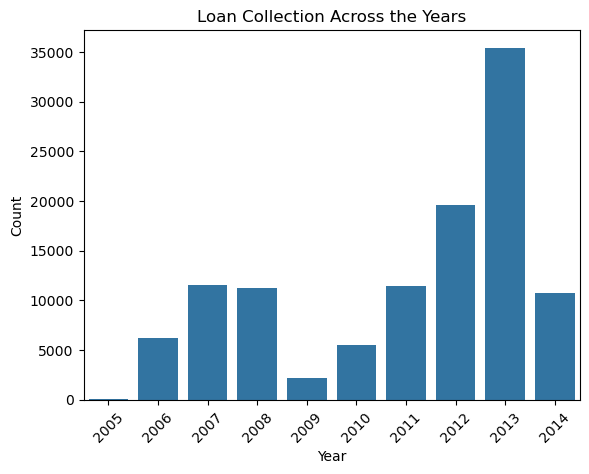

In [14]:
sns.countplot(data=loan_df_clean, x='Year', color = sns.color_palette()[0])
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Loan Collection Across the Years');

The number of Prosper Loans given out yearly are generally between five thousand and twenty thousand with the exception of the spike in 2013.

--

Lastly for univariate analysis, I'll be tenors' frequency of occurence using a pie chart. What is the most common tenor for Prosper loan applications?


In [15]:
tenor = loan_df_clean['Term'].value_counts()

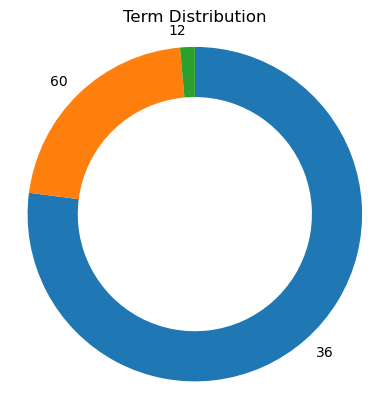

In [16]:
plt.pie(tenor, labels = tenor.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.3})
plt.axis('square')
plt.title('Term Distribution');

---

#### Bivariate Exploration

In this section, I'll explore the relationship between certain variables and how they interact with each other in the dataset. Some of the relationships to be explored includes borrower rates vs term - does the term affect the rate? What effect does Prosper rating have on borrower rate and do higher loan amounts translate to lower loan rates as commonly seen?

The first visual below shows the relationship between the Borrower Rate and Tenor.

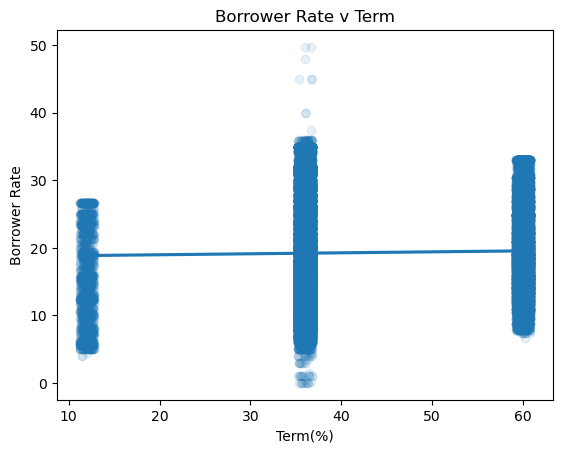

In [17]:
#using seaborn regplot to exp

sns.regplot(data = loan_df_clean, y= 'BorrowerRate', x= 'Term', x_jitter = 0.8, scatter_kws = {'alpha' : 0.1})
plt.xlabel('Term(%)')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate v Term');

There is no clear correlation between Borrower Rate and Tenor with 36 being the most frequently occuring term as earlier illustrated in the univariate analysis.

---

Next I will explore the relationship between the Prosper Ratings(alpha and numeric) and Borrower Rate

In [18]:
# extracting values from the dataframe where the ProsperRatings numeric are not null

rating_df = loan_df_clean[loan_df_clean['ProsperRating (numeric)'].isna() == False]

In [19]:
rating_df 

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Month,Year
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,9.20,0.0820,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2,2014
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,9.74,0.0874,...,0.0,0.0,0.0,1.0,0,0,0.0,158,10,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,20.85,0.1985,...,0.0,0.0,0.0,1.0,0,0,0.0,20,9,2013
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaN,0.15425,13.14,0.1214,...,0.0,0.0,0.0,1.0,0,0,0.0,1,12,2013
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,NaN,36,Current,NaN,0.31032,27.12,0.2612,...,0.0,0.0,0.0,1.0,0,0,0.0,1,4,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663,NaN,36,Current,NaN,0.22354,18.64,0.1764,...,0.0,0.0,0.0,1.0,0,0,0.0,1,4,2013
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333,NaN,36,FinalPaymentInProgress,NaN,0.13220,11.10,0.1010,...,0.0,0.0,0.0,1.0,0,0,0.0,22,11,2011
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703,NaN,60,Current,NaN,0.23984,21.50,0.2050,...,0.0,0.0,0.0,1.0,0,0,0.0,119,12,2013
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597,NaN,60,Completed,2013-08-13 00:00:00,0.28408,26.05,0.2505,...,0.0,0.0,0.0,1.0,0,0,0.0,274,11,2011


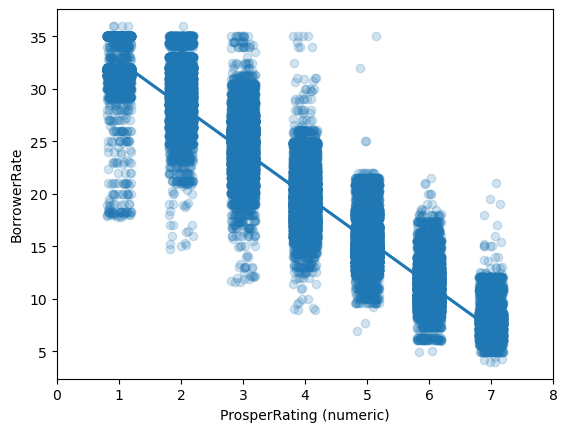

In [20]:
sns.regplot(data = rating_df, x= 'ProsperRating (numeric)', y= 'BorrowerRate', x_jitter = 0.2, scatter_kws = {'alpha' : 0.2})
plt.xticks(np.arange(0,9,1));

There is a clear negative correlation between Borrower Rate and Prosper Rating (numeric). Loan applicants with higher Prosper Ratings are given significantly lesser rates compared to those with lower ratings.

---

In [21]:
# Creating an order for the ratings alpha from the lowest 'HR' to the highest 'AA'

ratings_alpha = [ 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ralpha = pd.api.types.CategoricalDtype(ordered=True, categories=ratings_alpha)
loan_df_clean['ProsperRating (Alpha)'] = loan_df_clean['ProsperRating (Alpha)'].astype(ralpha)

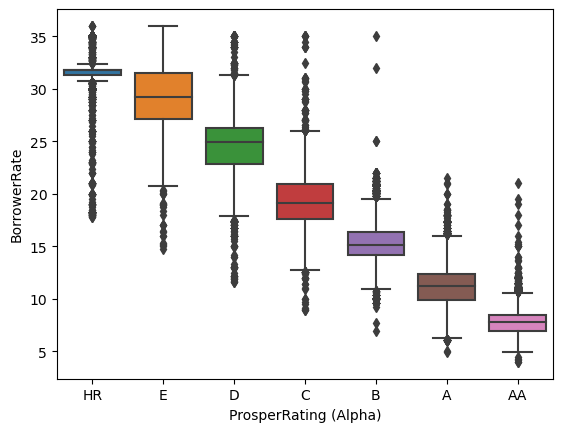

In [22]:
# Using a boxplot to show the relationship between Prosper Rating (alpha) and Borrower Rate

alpha_rating_df = loan_df_clean[loan_df_clean['ProsperRating (Alpha)'].isnull() == False]

sns.boxplot(data = alpha_rating_df, x = 'ProsperRating (Alpha)', y = 'BorrowerRate');


The ProsperRatings Alpha follow the same trend as the Numeric Ratings. Customers with lower alpha ratings are given much higher rates compared to the higher rated customers who get significantly lower rates on loans taken.

---

Exploring the relationship between Borrower Rates and Loan amount

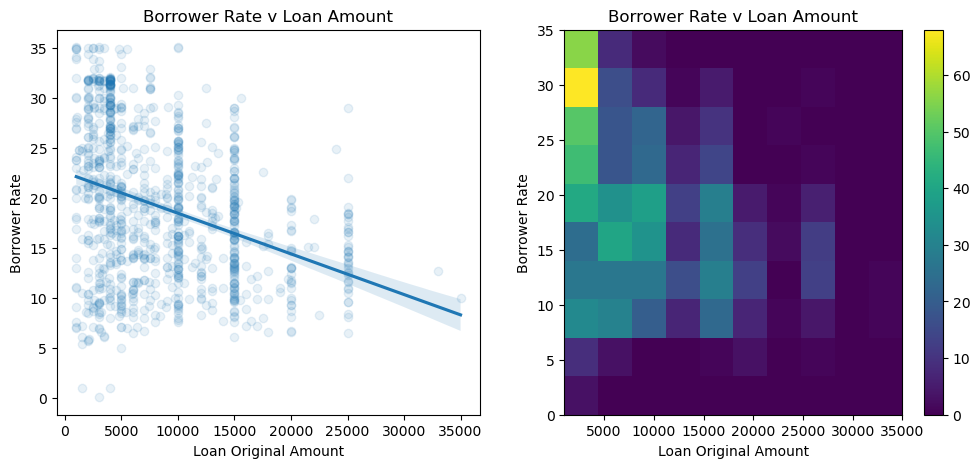

In [23]:
#using numpy random.choice to generate a pseudo-random array of 1000 rows to reduce noise in our plot

np.random.seed(0)
sample = np.random.choice(loan_df_clean.shape[0], 1000, replace = False)
loan_df_subset = loan_df_clean.reindex(sample)



# first plot

plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sns.regplot(data = loan_df_subset, x='LoanOriginalAmount', 
            y= 'BorrowerRate',  scatter_kws = {'alpha' : 0.1}, y_jitter = 0.1)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate v Loan Amount');

# second plot

plt.subplot(1,2,2)
plt.hist2d(data = loan_df_subset, x= 'LoanOriginalAmount', y='BorrowerRate')
plt.colorbar()
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate v Loan Amount');


From the plots above, we can observe a slight negative correlation between the Loan Amount and Borrower Rates. Rates appear to drop as the loan amount goes higher.

---

In the final multivariate plot, I will examine the relationship between the borrower Rate and the number of investors.
Does the number of investors on a particular listing determine the rate? I will attempt to illustrate this in the plot below.

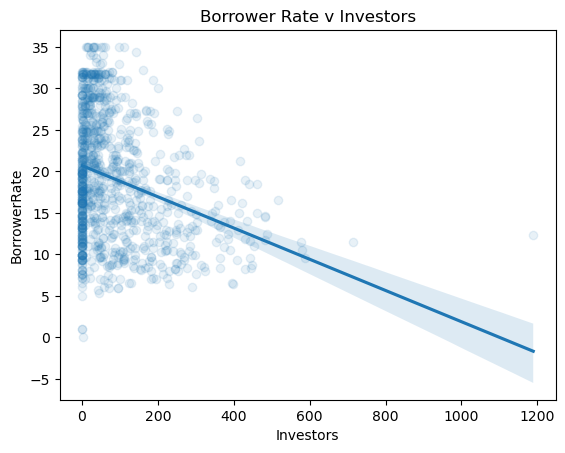

In [24]:
# generating an array of random rows

np.random.seed(5)
sample_1 = np.random.choice(loan_df_clean.shape[0], 100000, replace = False)
loan_df_sample = loan_df_clean.reindex(sample)


sns.regplot(data = loan_df_sample, y= 'BorrowerRate', x = 'Investors', scatter_kws = {'alpha' : 0.1})
plt.title('Borrower Rate v Investors');

There is a slight negative correlation between the borrower rate and number of investors. We can observe from the plot that the borrower rate appears to slightly reduce as  the number of investors increase.

---

#### MULTIVARIATE ANALYSIS

In this section, I will be evaluating the relationships between several variables and show how one or more variables affect one variable.

Some of the variables whose relationships I will be exploring includes the Debt-to-income ratio and Borrower Rate v Loan Original Amount. Also I will look at how Prosper Rating affects borrower Rate and loan amount.


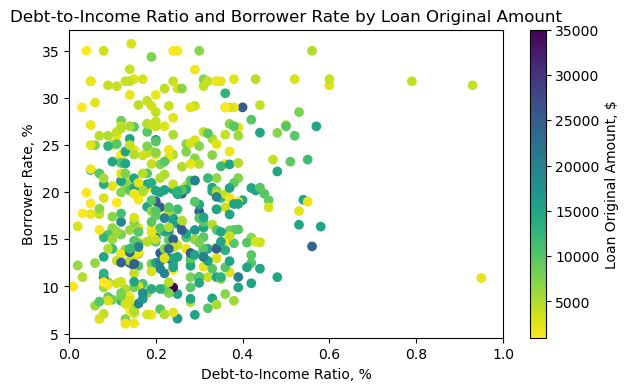

In [25]:
np.random.seed(5)
sample = np.random.choice(loan_df_clean.shape[0], 500, replace = False)
loan_df_subset = loan_df_clean.reindex(sample)

# plotting the data
plt.figure(figsize = [7,4])
plt.scatter(data = loan_df_subset, x = 'DebtToIncomeRatio', y = 'BorrowerRate', c = 'LoanOriginalAmount',
            cmap = 'viridis_r')
plt.xlim(0, 1.0)
plt.title('Debt-to-Income Ratio and Borrower Rate by Loan Original Amount')
plt.xlabel('Debt-to-Income Ratio, %')
plt.ylabel('Borrower Rate, %')
plt.colorbar(label = 'Loan Original Amount, $');

From the above plot we can make the following inferences:

the overwelming majority of loans were provided to borrowers with the Debt-to-Income Ratio of below 0.6. Overcredited borrowers with DIR above 0.4 are very rare in the dataset;

the higher the Borrower Rate is, the lower the Loan Amount is;

the higher the Debt-to-Income Ratio is, the lower the Loan Amount is.

The larger loan amounts were provided at lower interest rates and to borrowers with the Debt-to-Income Ratio under 0.4.

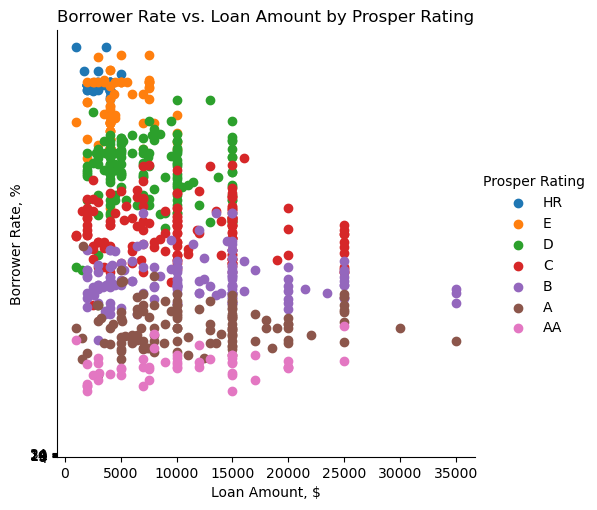

In [26]:
np.random.seed(5)
sample_1000 = np.random.choice(loan_df_clean.shape[0], 1000, replace = False)
loan_df_subset1000 = loan_df_clean.reindex(sample_1000)


g = sns.FacetGrid(data = loan_df_subset1000, hue = 'ProsperRating (Alpha)', height = 5);
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');
tick_props = np.arange(0.04, 0.36, 0.05)
tick_names = ['{:0.0f}'.format(v*100) for v in tick_props]
plt.yticks(tick_props, tick_names)
plt.xlabel('Loan Amount, $')
plt.ylabel('Borrower Rate, %')
plt.title('Borrower Rate vs. Loan Amount by Prosper Rating')
g.add_legend(title = 'Prosper Rating');

This distribution clearly shows that the higher the Prosper Rating of a borrower is, the lower the Borrower Rate is. As for the Loan Amount, we see that the Loan Amount increases as the Prosper Rating increases and certain thresholds in the Loan Amount may be observed for particular Prosper Ratings, for example, 10K for E-borrowers, 15K for D-, C- and B-borrowers and the largest threshold for A- and AA-borrowers. And borrowers with the best Prosper Rating (AA) tend not to borrow large amounts. Way to go to keep their high ratings!

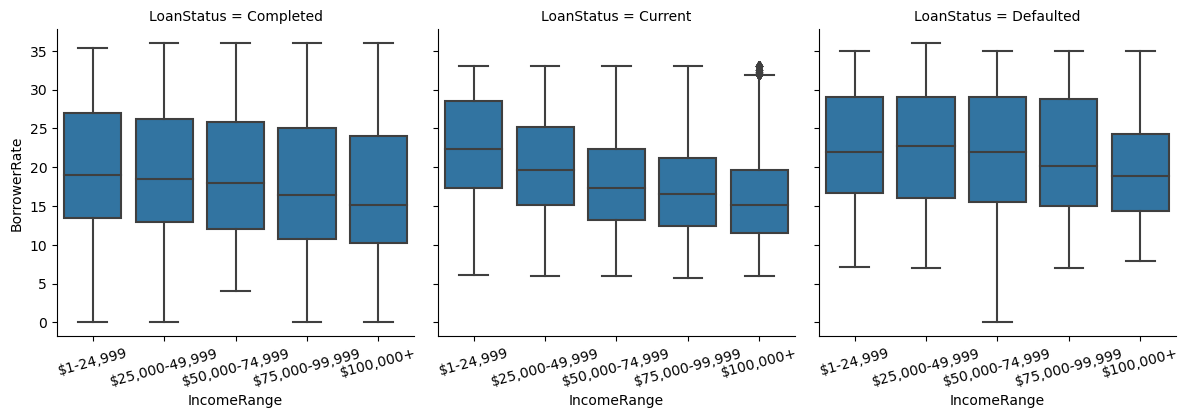

In [27]:
loan_df_status_2 = loan_df_clean[(loan_df_clean['LoanStatus']=='Defaulted') | (loan_df_clean['LoanStatus']=='Current') | (loan_df_clean['LoanStatus']=='Completed')].copy()
loan_df_status_2['LoanStatus'] = loan_df_status_2['LoanStatus'].astype(str)
g = sns.FacetGrid(loan_df_status_2, col = 'LoanStatus', height = 4)
g.map(sns.boxplot, 'IncomeRange', 'BorrowerRate', order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                '$75,000-99,999', '$100,000+']);
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

For the loans with the Loan Status of Current and Completed, the Borrower Rate decreased as the Income Range increased. For the Defaulted loans, however, the Borrower Rate remained on the same high level, except for the most upper Income Range. We already saw that the high rate was characteristic of the borrowers with lower Prosper Ratings. From these plots we see that the defaulted loans tend to have higher Borrower Rates, which confirms that the lenders know if a borrower is likely not to return the loan.

---

#### CONCLUSION

Based on my analysis of the Prosper loan dataset, I can conclude that all the following parameters influenced the Borrower Rate:

Loan Amount
Prosper Rating
Income Range
Debt-to-Income Ratio.
Most vividly, the Borrower Rate was affected by the Prosper Rating.

The most interesting insights identified include:

In the subset of Borrower Rates above 31%, there are clusters of rates at particular thresholds. The majority of these high rates are attributable to 2010 and 2011 years. The overwelming majority of the high-rate loans were capped by the amount of 8K.

The overwelming majority of loans were provided to borrowers with the Debt-to-Income Ratio of below 0.4. The higher the Debt-to-Income Ratio is, the lower the Loan Amount is. The larger loan amounts were provided at lower interest rates and to borrowers with the Debt-to-Income Ratio under 0.4.

The higher the Prosper Rating of a borrower is, the lower the Borrower Rate is. The Loan Amount increases as the Prosper Rating increases and certain thresholds in the Loan Amount may be observed for particular Prosper Ratings. And borrowers with the best Prosper Rating (AA) tend not to borrow large amounts. Way to go to keep their ratings high!